<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/606_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%ED%9A%8C%EA%B7%80%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
####################
######난수발생#####
###################

#0부터 1사이의 균일분포
data = np.random.rand(10)
print(data)

#가우시안 표준 정규분포 (평균: 0, 표준편차 : 1)
data = np.random.randn(10)
print(data)

#균일분포의 정수 난수
data = np.random.randint(10)
print(data)

[0.51629683 0.82817762 0.45534164 0.63881705 0.97684864 0.67887105
 0.61105356 0.94885243 0.68267567 0.64516431]
[-0.29196095 -0.7450927   0.37226001  0.28655994  0.19421042  1.71091481
 -0.35035627  0.18615717 -0.65150795  0.61848923]
1


In [9]:
########################
##데이터 순서 바꾸기 ###

print('np.random.shuffle')
#np.random.shuffle: 배열의 요소변경
data = np.arange(10)
print(data)

item= np.random.shuffle(data)
print(item)
print(data)

print('np.random.permutaion')
data = np.arange(10)
print(data)

np.random.shuffle
[0 1 2 3 4 5 6 7 8 9]
None
[8 5 1 3 2 0 4 6 7 9]


In [13]:
##################
##데이터 샘플링###
# np.random.choice (a, size=None, replace =True, p=None)
# a : 배열이면 배열자체, 정수이면 arange(1) 명령으로 배열생성
# size : 정수, 샘플숫자
# replace : boolean, True이면 복원추출, False 면 비복원추출
# p : 배열, 각 데이터가 선택될 수 있는 확률

print(np.random.choice (5,5, replace = False))

data = np.arange (10)
print(np.random.choice(data,5))

[2 1 3 0 4]
[3 0 6 2 1]


#### 추세선(Trend Line)
- 추세선(Trend Line)은 데이터의 추세를 그래픽으로 표시하고 예측 문제를 분석하는데 사용된다.
- 이러한 분석을 회귀분석(예측을 위해 사용하는 통계분석의 한가지)이라고 하며,
회귀분석을 사용하여 실제 데이터가 존재하지 않는 범위의 값을 예측할 수 있다.
- 추세선을 사용할 수 있는 차트 : 누적형이 아닌 2차원 영역형, 가로 막대형, 세로 막대형, 꺾은선형, 주식형,분산형, 거품형
- 추세선을 사용할 수 없는 차트 : 3차원, 누적형, 방사형, 원형, 표면형, 도넛형

(100, 1)


<Axes: xlabel='X', ylabel='y'>

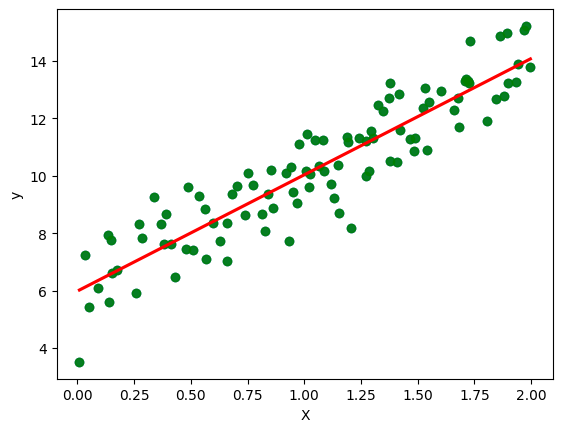

In [28]:
#y = 4X + 6

X = 2 * np.random.rand(100,1)
#print(X)

y= 6 + 4*X + np.random.randn(100,1)
print(y.shape)
#print(y)

plt.scatter(X,y)

pd_X = pd.DataFrame(X,columns=['X'])
pd_y = pd.DataFrame(y,columns=['y'])
pd_df = pd.concat([pd_X, pd_y], axis = 1)

pd_df.head(2)

#sns.regplot(x='X', y='y', data = pd_df, color='g', ci=None)
sns.regplot(x='X', y='y', data = pd_df, line_kws={'color':'red'},scatter_kws={'color':'green'}, ci=None)

경사 하강법 (gradiendt_descent_steps)_MSE(평균제곱오차계산식)

In [64]:
def get_weight_updates(w, b, X, y, learning_rate = 0.01, l1=0.2, l2=0.7):
  N= len(y)

# W,b와 동일한 크기를 가진 0값으로 초기화
  w_update = np.zeros_like(w)
  b_update = np.zeros_like(b)


  #예측배열 계산하고 에측과 실제값의 차이 계산
 #y_pred =wX +b
  y_pred = np.dot(X, w.T) +b    # (4,1) (1,1) =(4,1)
  diff = y - y_pred

  #b_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성

  b_factors = np.ones((N,1))


  # w와 b를 업데이트 할 w_update와 b_update를 계산
  w_update = -(2/N) *learning_rate *(np.dot(X.T,diff)) #(1,4 ) (4,1)
  b_update = -(2/N) *learning_rate *(np.dot(b_factors.T,diff))
  return w_update, b_update




In [75]:
# 입력인자 epochs로 주어진 횟수만큼 반복적으로 w와 b를 업데이트 함
def gradient_descent_steps(X, y, epochs =2):

 # w와 b를 모두 0으로 초기화
 w = np.zeros((1,1))
 b = np.zeros((1,1))


 for ind in range(epochs):
  w_update, b_update = get_weight_updates(w,b,X,y, learning_rate = 0.1)
  w= w - w_update
  b= b - b_update
  return w,b



In [78]:
# 실제 y값과 예측된 y값을 인자로 받아서 mse (평균제곱오차계산식)구현
# 이를 이용해 경사 하강법의 예측 오류도 계산
def get_cost (y, y_pred):
  N= len(y)
  cost = np.sum(np.square(y-y_pred)) /N
  return cost

X = 2* np.random.rand(100,1)
#print(X)

y= 6 + 4*X +np.random.randn(100,1)  #y=xX +b
#print(y)

print (X.shape)
print (y.shape)

w,b = gradient_descent_steps(X,y, epochs=1000)
print('w:{0:.3f} b{1:.3f}'.format(w[0,0], b[0,0]))

y_pred = w[0,0] * X +b

print('Grident Descent Total Cost: {0:.4f}'.format (get_cost(y, y_pred)))

(100, 1)
(100, 1)
w:2.755 b2.146
Grident Descent Total Cost: 30.7378


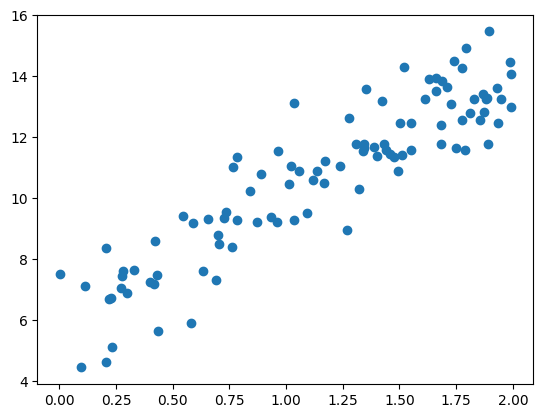

In [79]:

plt.scatter(X,y)

In [76]:
X = 2 * np.random.rand(4, 1)
#print(X)
y = 6 + 4*X + np.random.randn(4,1)

print(X.shape)
print(y.shape)


w, b= gradient_descent_steps(X, y)
print('w:{0:.3f} b:{1:.3f}'.format(w[0,0], b[0,0]))


(4, 1)
(4, 1)
w:1.733 b:1.961


In [35]:
y= np.array ([1,3,5,6])
N= len(y)
b_factors = np.ones((N,1))
b_factors

array([[1.],
       [1.],
       [1.],
       [1.]])